### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [74]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [75]:
# Load the CSV file(s) as reviews.
tr = pd.read_csv("turtle_reviews.csv")

# View the DataFrame.
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [76]:
# Check for missing values.
print("There are", tr[tr.isna().any(axis=1)].shape[0], "rows with missing values")

There are 0 rows with missing values


In [77]:
# Descriptive statistics.
tr.describe(include = 'all')

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
count,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000,2000
unique,2,NaN,NaN,NaN,NaN,5,1,1,NaN,1980,1432
top,Female,NaN,NaN,NaN,NaN,graduate,EN,Web,NaN,love it,Five Stars
freq,1120,NaN,NaN,NaN,NaN,900,2000,2000,NaN,5,378
mean,NaN,39.495000,48.079060,50.000000,1578.032000,NaN,NaN,NaN,4320.521500,NaN,NaN
std,NaN,13.573212,23.123984,26.094702,1283.239705,NaN,NaN,NaN,3148.938839,NaN,NaN
min,NaN,17.000000,12.300000,1.000000,25.000000,NaN,NaN,NaN,107.000000,NaN,NaN
25%,NaN,29.000000,30.340000,32.000000,772.000000,NaN,NaN,NaN,1589.250000,NaN,NaN
50%,NaN,38.000000,47.150000,50.000000,1276.000000,NaN,NaN,NaN,3624.000000,NaN,NaN
75%,NaN,49.000000,63.960000,73.000000,1751.250000,NaN,NaN,NaN,6654.000000,NaN,NaN


In [78]:
# Inspect frequencies of categorical values.
print(tr.value_counts("age").reset_index(name="Count").sort_values('age'))
print()
print(tr.value_counts("gender", sort = True).reset_index(name="Count"))
print()
print(tr.value_counts("education", sort = True).reset_index(name="Count"))
print()
print(tr.value_counts("language", sort = True).reset_index(name="Count"))
print()
print(tr.value_counts("platform", sort = True).reset_index(name="Count"))

    age  Count
22   17     30
8    18     80
43   19     10
13   22     50
12   23     50
25   24     30
9    25     60
16   26     40
27   27     30
32   28     20
3    29    110
2    32    110
7    33     80
4    34    110
26   35     30
11   36     50
5    37     90
0    38    180
6    39     80
38   40     20
24   41     30
28   42     20
23   43     30
20   44     30
10   45     60
14   46     50
1    49    120
37   50     20
36   51     20
35   52     20
17   53     40
41   54     10
40   55     10
34   56     20
33   57     20
15   58     40
19   62     30
31   65     20
42   66     10
30   67     20
29   68     20
18   69     40
21   70     30
44   71     10
39   72     20

   gender  Count
0  Female   1120
1    Male    880

      education  Count
0      graduate    900
1           PhD    460
2  postgraduate    400
3       diploma    190
4         Basic     50

  language  Count
0       EN   2000

  platform  Count
0      Web   2000


## 2. Drop columns

In [79]:
# Drop unnecessary columns.
tr_cleaned = tr.drop(columns=["language", "platform"])

## 3. Rename columns

In [80]:
# Rename column names.
tr_cleaned = tr_cleaned.rename(columns={'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'})

# View new column names
print(tr_cleaned.columns)

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [81]:
# Create a CSV file as output.
tr_cleaned.to_csv('turtle_reviews_cleaned.csv', index=False)

In [82]:
# Import new CSV file with Pandas.
tr = pd.read_csv('turtle_reviews_cleaned.csv')

# View DataFrame.
tr.describe(include = 'all')

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
count,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000.000000,2000,2000
unique,2,NaN,NaN,NaN,NaN,5,NaN,1980,1432
top,Female,NaN,NaN,NaN,NaN,graduate,NaN,love it,Five Stars
freq,1120,NaN,NaN,NaN,NaN,900,NaN,5,378
mean,NaN,39.495000,48.079060,50.000000,1578.032000,NaN,4320.521500,NaN,NaN
std,NaN,13.573212,23.123984,26.094702,1283.239705,NaN,3148.938839,NaN,NaN
min,NaN,17.000000,12.300000,1.000000,25.000000,NaN,107.000000,NaN,NaN
25%,NaN,29.000000,30.340000,32.000000,772.000000,NaN,1589.250000,NaN,NaN
50%,NaN,38.000000,47.150000,50.000000,1276.000000,NaN,3624.000000,NaN,NaN
75%,NaN,49.000000,63.960000,73.000000,1751.250000,NaN,6654.000000,NaN,NaN


## 5. Linear regression

### 5a) spending vs loyalty

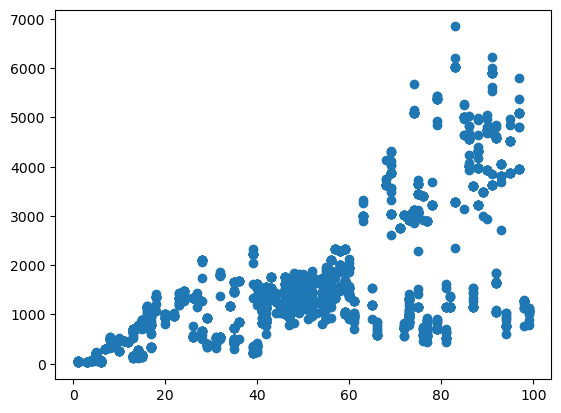

In [83]:
# Independent variable.
y = tr['loyalty_points']

# Dependent variable.
x = tr['spending_score']

# Scatterplot.
plt.scatter(x, y)

In [84]:
# OLS model and summary.
test = ols('y ~ x', data = tr).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):          2.92e-263
Time:                        21:30:07   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# Extract the estimated parameters.
print("Parameters:", test.params)

# Extract the standard errors.
print("Standard errors:", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters: Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors: Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [86]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * tr['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

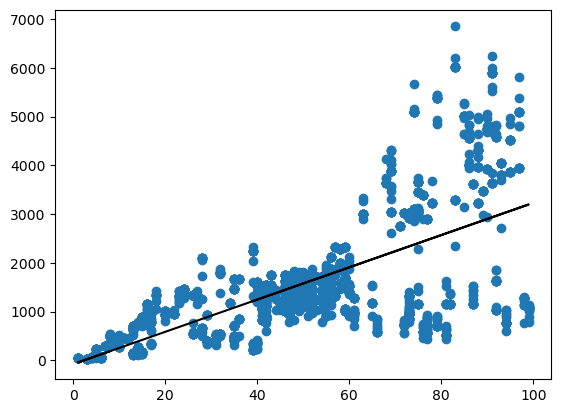

In [87]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# View the plot.
plt.show()

### 5b) remuneration vs loyalty

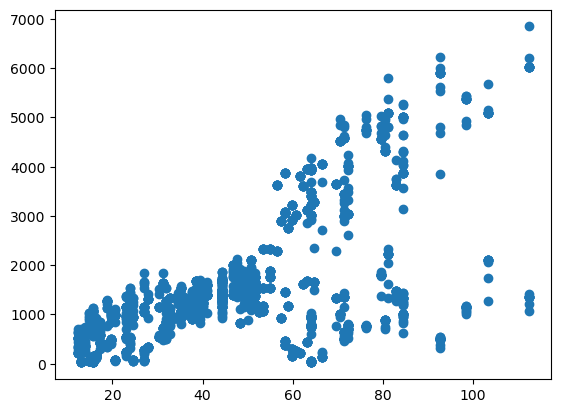

In [88]:
# Independent variable.
y = tr['loyalty_points']

# Dependent variable.
x = tr['remuneration']

# Scatterplot.
plt.scatter(x, y)

In [89]:
# OLS model and summary.
test = ols('y ~ x', data = tr).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):          2.43e-209
Time:                        21:30:08   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# Extract the estimated parameters.
print("Parameters:", test.params)

# Extract the standard errors.
print("Standard errors:", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters: Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors: Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [91]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * tr['remuneration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

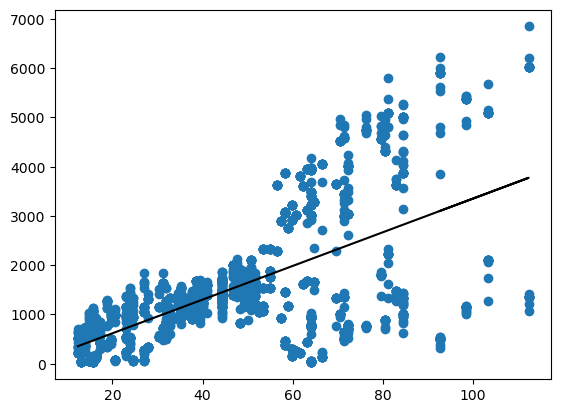

In [92]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# View the plot.
plt.show()

### 5c) age vs loyalty

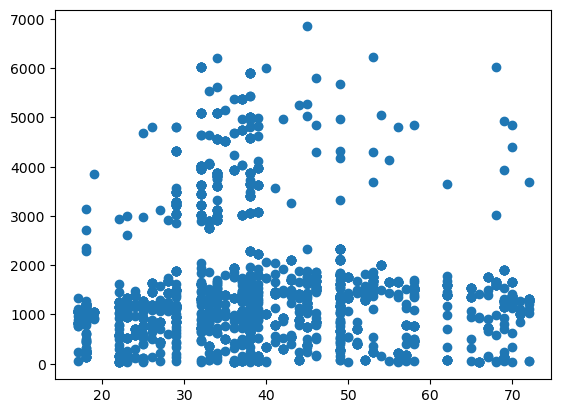

In [93]:
# Independent variable.
y = tr['loyalty_points']

# Dependent variable.
x = tr['age']

# Scatterplot.
plt.scatter(x, y)

In [94]:
# OLS model and summary.
test = ols('y ~ x', data = tr).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 31 Aug 2023   Prob (F-statistic):             0.0577
Time:                        21:30:08   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Extract the estimated parameters.
print("Parameters:", test.params)

# Extract the standard errors.
print("Standard errors:", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters: Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors: Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [96]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.517739) + -4.012805 * tr['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

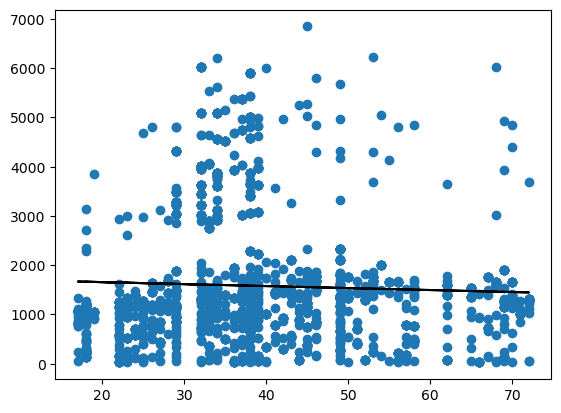

In [97]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# View the plot.
plt.show()

## 6. Observations and insights

- The correlation between age and loyalty points is not significant, as evidenced by the Prob (F-statistic) value of 0.0577, which is greater than the threshold of 0.05. This lack of correlation is also contributing to the regression model not being effective.
- The relationship between spending score and loyalty points exhibits strong correlation, as indicated by the linear regression model that accounts for 45.2% of the data's variation.
- The correlation between remuneration and loyalty points is similarly strong, as evidenced by the linear regression model explaining 38% of the data's variability.
- The estimated slopes for both spending score vs. loyalty points and remuneration vs. loyalty points are statistically significant, as evidenced by the t-values being zero.

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [98]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [103]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_cleaned.csv')

# View DataFrame.
df2.describe(include = 'all')

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
count,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000.000000,2000,2000
unique,2,NaN,NaN,NaN,NaN,5,NaN,1980,1432
top,Female,NaN,NaN,NaN,NaN,graduate,NaN,love it,Five Stars
freq,1120,NaN,NaN,NaN,NaN,900,NaN,5,378
mean,NaN,39.495000,48.079060,50.000000,1578.032000,NaN,4320.521500,NaN,NaN
std,NaN,13.573212,23.123984,26.094702,1283.239705,NaN,3148.938839,NaN,NaN
min,NaN,17.000000,12.300000,1.000000,25.000000,NaN,107.000000,NaN,NaN
25%,NaN,29.000000,30.340000,32.000000,772.000000,NaN,1589.250000,NaN,NaN
50%,NaN,38.000000,47.150000,50.000000,1276.000000,NaN,3624.000000,NaN,NaN
75%,NaN,49.000000,63.960000,73.000000,1751.250000,NaN,6654.000000,NaN,NaN


In [107]:
# Drop unnecessary columns.
df2.drop(columns=['gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary'], 
         inplace=True, 
         errors='ignore')

# View DataFrame.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

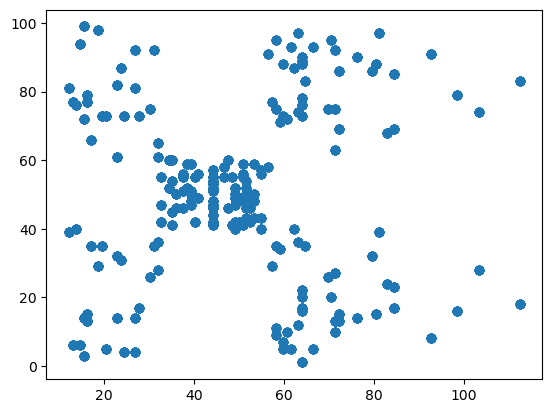

In [109]:
# Create a scatterplot with Seaborn.
plt.scatter(df2.remuneration, df2.spending_score)
plt.show()

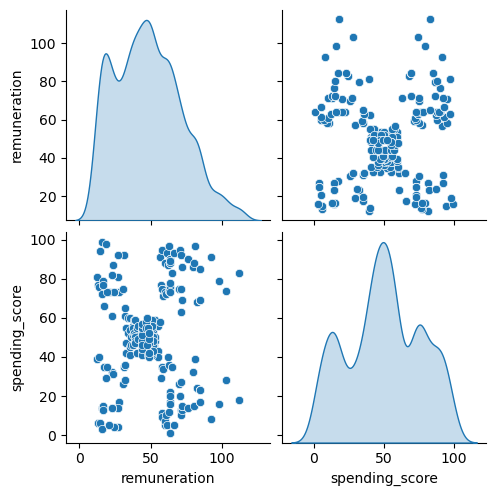

In [113]:
# Create a pairplot with Seaborn.
sns.pairplot(df2, diag_kind='kde')
plt.show()

## 3. Elbow and silhoutte methods

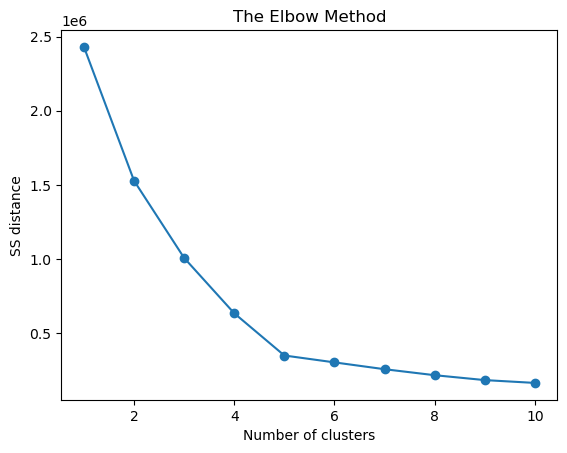

In [117]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i).fit(df2)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

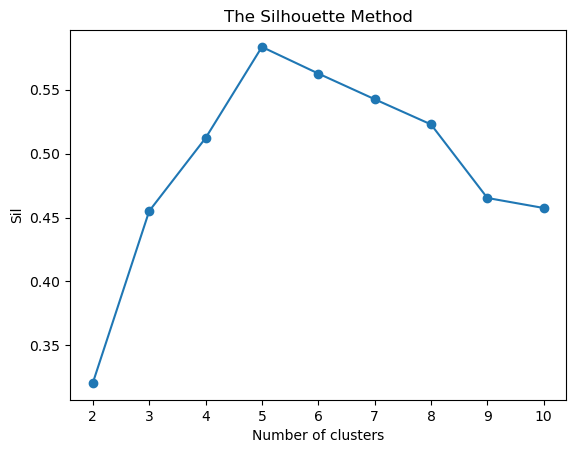

In [120]:
# Determine the number of clusters: Silhouette method.

# Find the range of clusters to be used using silhouette method.
sil = []

for k in range(2, 11):
    kmeans_s = KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, 11),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

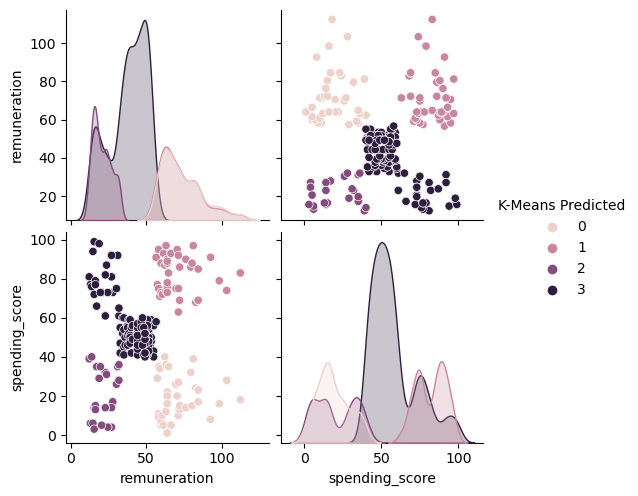

In [132]:
# Try 4 clusters:
kmeans = KMeans(n_clusters=4).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')
plt.show()

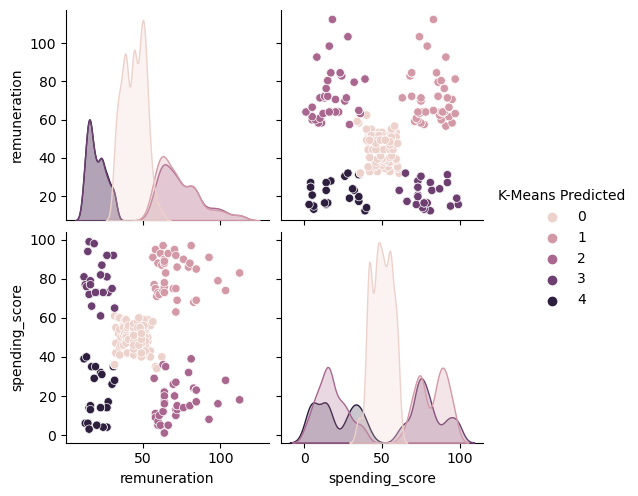

In [133]:
# Try 5 clusters:
kmeans = KMeans(n_clusters=5).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')
plt.show()

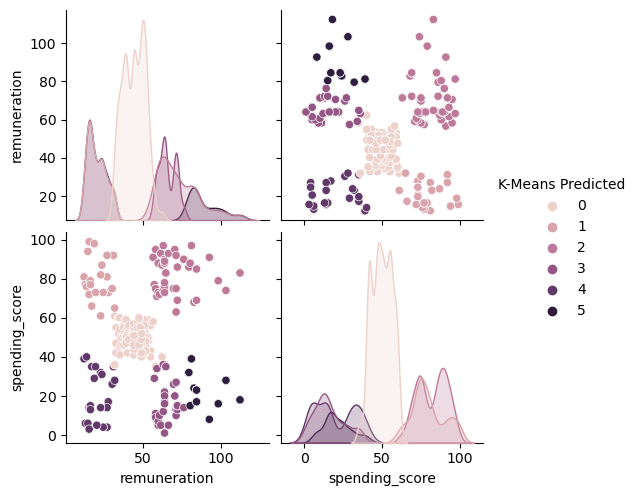

In [134]:
# Try 6 clusters:
kmeans = KMeans(n_clusters=6).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')
plt.show()

## 5. Fit final model and justify your choice

Using 5 clusters due to both elbow and silhouette methods indicating 5 clusters are ideal. Also the demonstrations above show that 4 clusters are not enough since high renumeration high spending score gets merged with the middle group and 6 clusters are too much since the high and low spending score groups look similar while one is represented as a single cluster and the other being broken down into two clusters.

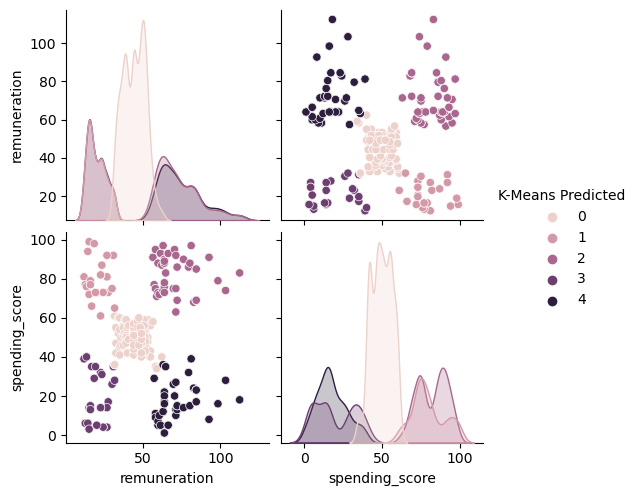

In [137]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')
plt.show()

In [138]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

We can label the identified clusters as follows:
    
- **High-Value Customers:** The cluster with high spending scores and high remuneration. These customers are both active and valuable to the business.

- **Opportunity Customers:** The cluster with high spending scores but low remuneration. This label suggests that there is potential to increase their engagement and remuneration.

- **High-Revenue Occasional Customers:** The cluster with low spending scores but high remuneration. These customers make infrequent but substantial purchases.

- **Low-Engagement Customers:** The cluster with low spending scores and low remuneration. These customers might require targeted engagement strategies.

- **Moderate Value Customers:** The cluster with medium spending scores and medium remuneration. This label indicates a balanced contribution from these customers.

In [143]:
# Interpret the clusters
df2['Customer Category'] = ''
df2.loc[df2['K-Means Predicted'] == 0, 'Customer Category'] = 'Moderate Value Customers'
df2.loc[df2['K-Means Predicted'] == 1, 'Customer Category'] = 'Opportunity Customers'
df2.loc[df2['K-Means Predicted'] == 4, 'Customer Category'] = 'High-Revenue Occasional Customers'
df2.loc[df2['K-Means Predicted'] == 3, 'Customer Category'] = 'Low-Engagement Customers'
df2.loc[df2['K-Means Predicted'] == 2, 'Customer Category'] = 'High-Value Customers'

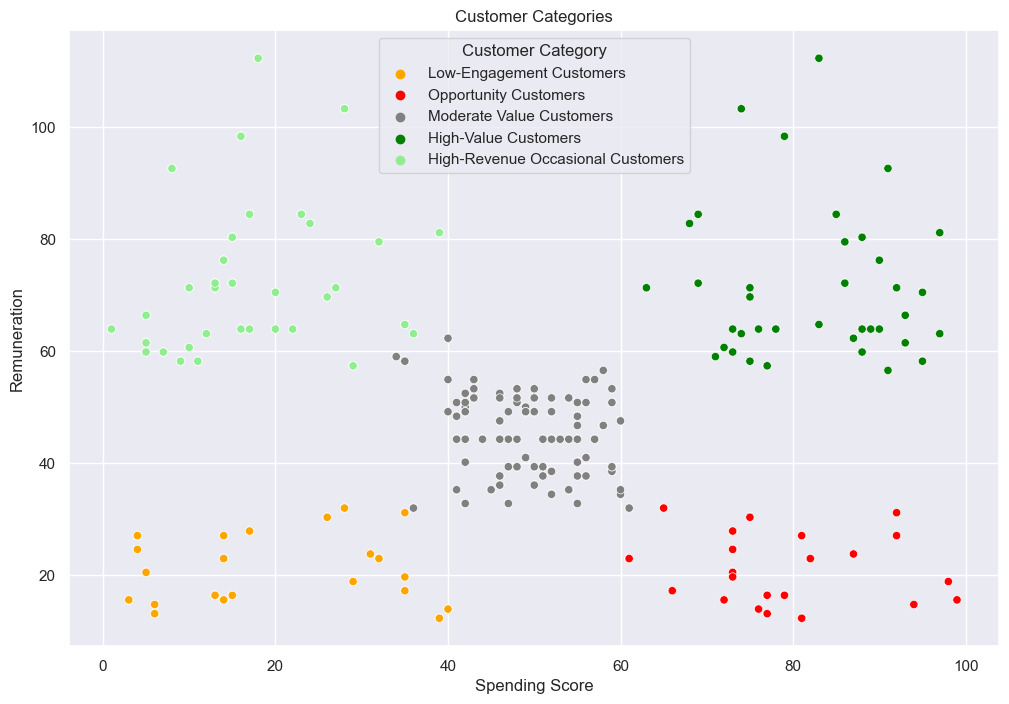

In [152]:
# Visualising the clusters.

# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spending_score', 
                y='remuneration',
                data=df2,
                hue='Customer Category',
                palette=['orange', 'red', 'gray', 'green', 'lightgreen'])
plt.title("Customer Categories")
plt.xlabel("Spending Score")
plt.ylabel("Remuneration")
plt.show()

## 7. Discuss: Insights and observations

The clustering analysis reveals five customer groups: High-Value Customers, Opportunity Customers, High-Revenue Occasional Customers, Low-Engagement Customers, and Moderate Value Customers. This information can be used to target specific market segments with tailored marketing strategies. For example, Opportunity Customers could be targeted with campaigns to increase their engagement and remuneration, while High-Revenue Occasional Customers could be targeted with retention campaigns.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [157]:
# Prepare workstation

# Install TextBlob.
# !pip install textblob

# Download words
# nltk.download('punkt')
# nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\basak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\basak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [202]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Set the colour palette.
sns.set(color_codes=True)

In [159]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_cleaned.csv')

# View DataFrame.
df3.describe(include='all')

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
count,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000.000000,2000,2000
unique,2,NaN,NaN,NaN,NaN,5,NaN,1980,1432
top,Female,NaN,NaN,NaN,NaN,graduate,NaN,love it,Five Stars
freq,1120,NaN,NaN,NaN,NaN,900,NaN,5,378
mean,NaN,39.495000,48.079060,50.000000,1578.032000,NaN,4320.521500,NaN,NaN
std,NaN,13.573212,23.123984,26.094702,1283.239705,NaN,3148.938839,NaN,NaN
min,NaN,17.000000,12.300000,1.000000,25.000000,NaN,107.000000,NaN,NaN
25%,NaN,29.000000,30.340000,32.000000,772.000000,NaN,1589.250000,NaN,NaN
50%,NaN,38.000000,47.150000,50.000000,1276.000000,NaN,3624.000000,NaN,NaN
75%,NaN,49.000000,63.960000,73.000000,1751.250000,NaN,6654.000000,NaN,NaN


In [182]:
# Keep necessary columns. Drop unnecessary columns.
df3_cleaned = df3[['review', 'summary']]

# View cleaned data frame
df3_cleaned.describe(include='all')

,review,summary
count,2000,2000
unique,1980,1432
top,love it,Five Stars
freq,5,378


In [284]:
# Explore top duplicate reviews
print('Most frequent reviews')
print(df3_cleaned.review.value_counts().head())
print("="*100)

print('Most frequent summaries')
print(df3_cleaned.summary.value_counts().head())
print("="*100)

# View sample data
print('Sample data')
print(df3_cleaned.head())

Most frequent reviews
love it       8
great game    8
great         7
good          4
fun game      4
Name: review, dtype: int64
Most frequent summaries
five stars    378
four stars     57
great game     22
fun            16
fun game       14
Name: summary, dtype: int64
Sample data
                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9\n\nyour unpainted...   
2  nice art nice printing  why two panels are fil...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  review_polarity  \
0  the fact that 50 of this space is wasted on ar...        -0.036111   
1  another worthless dungeon masters screen from ...         0.035952   
2                     pretty but also pretty useless         0.116640   
3                                         five stars         0.578788   
4              

In [184]:
# Determine if there are any missing values.
print("There are", df3_cleaned[df3_cleaned.isna().any(axis=1)].shape[0], "rows with missing values")

There are 0 rows with missing values


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [187]:
# Review: Change all to lower case
df3_cleaned['review'] = df3_cleaned.review.apply(lambda x: x.lower())

# View lowercase data
df3_cleaned.review.head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*:\n\nyour unpaint...
2    nice art, nice printing.  why two panels are f...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [188]:
# Summary: Change all to lower case and join with a space.
df3_cleaned['summary'] = df3_cleaned.summary.apply(lambda x: x.lower())

# View lowercase data
df3_cleaned.summary.head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [190]:
# Replace all the punctuations in review column.
df3_cleaned['review'] = df3_cleaned.review.str.replace('[^\w\s]','')

# View output.
df3_cleaned.review.head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9\n\nyour unpainted...
2    nice art nice printing  why two panels are fil...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [191]:
# Replace all the puncuations in summary column.
df3_cleaned['summary'] = df3_cleaned.summary.str.replace('[^\w\s]','')

# View output.
df3_cleaned.summary.head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [305]:
# Drop duplicate rows that appear across both columns
df3_cleaned.drop_duplicates(subset=['review', 'summary'], inplace=True)

# Drop duplicates of each column and create individual data frames since the row
# counts won't be the same anymore after this operation
review=df3_cleaned.drop_duplicates(subset=['review']).review
summary=df3_cleaned.drop_duplicates(subset=['summary']).summary

## 3. Tokenise and create wordclouds

In [306]:
# Apply tokenisation to both columns.
review_words = review.apply(word_tokenize)
print(review_words.head())

summary_words = summary.apply(word_tokenize)
print(summary_words.head())

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review, dtype: object
0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary, dtype: object


In [307]:
# Review: Create a word cloud.
all_review_words = ''
for r in review_words:
    all_review_words = all_review_words + ' '.join(r)

word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review_words) 

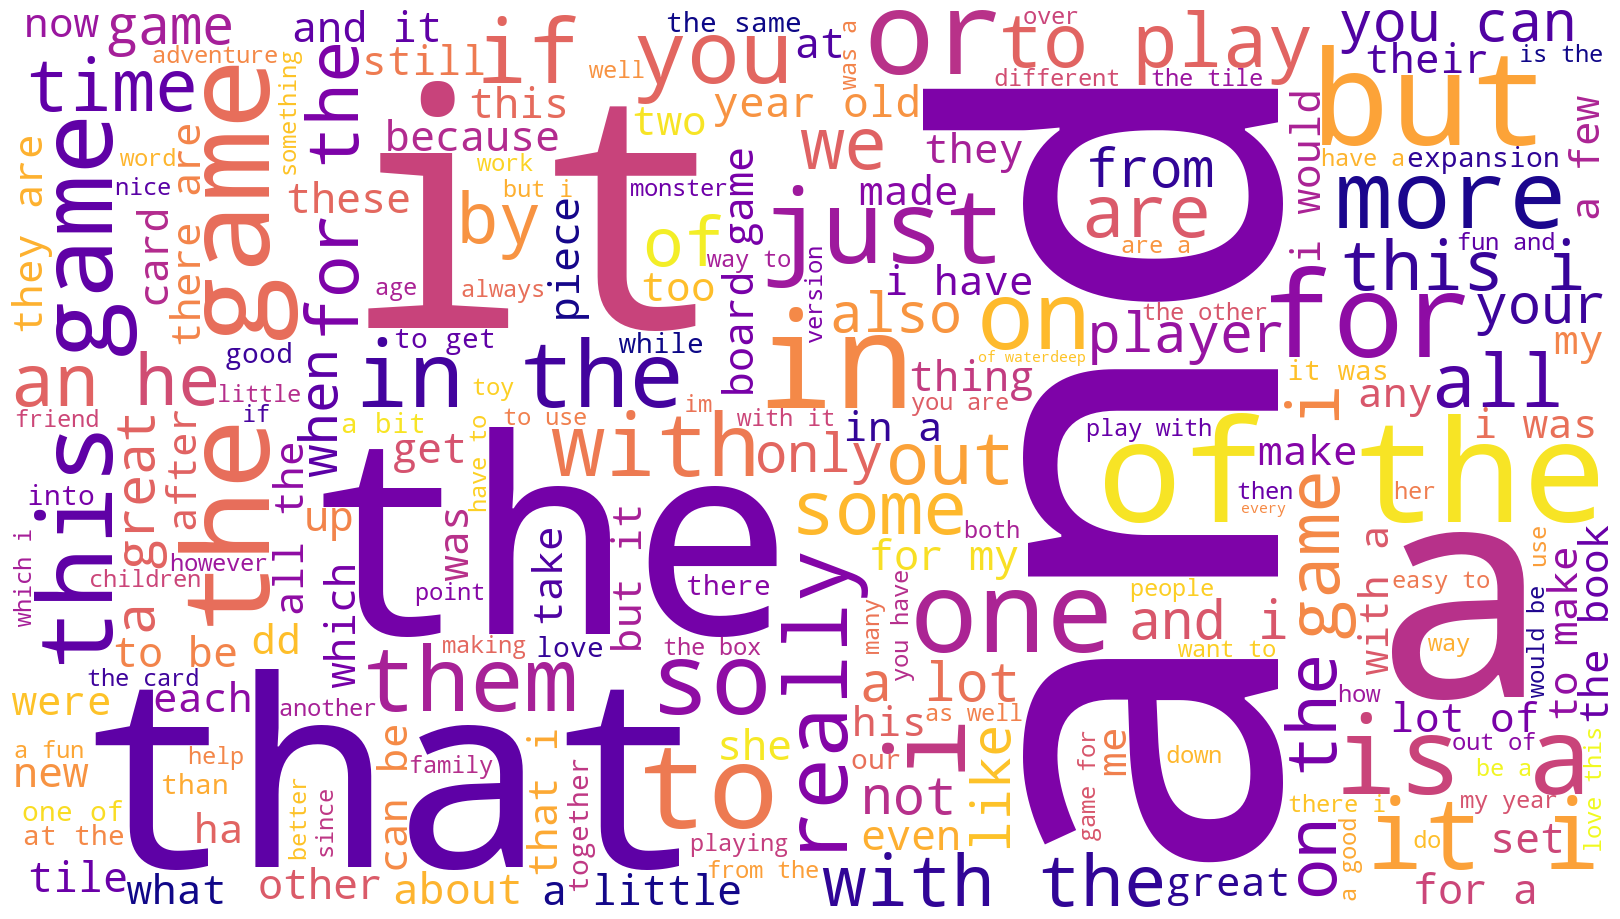

In [308]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [309]:
# Summary: Create a word cloud.
all_summary_words = ''
for r in summary_words:
    all_summary_words = all_summary_words + ' '.join(r)

word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary_words)

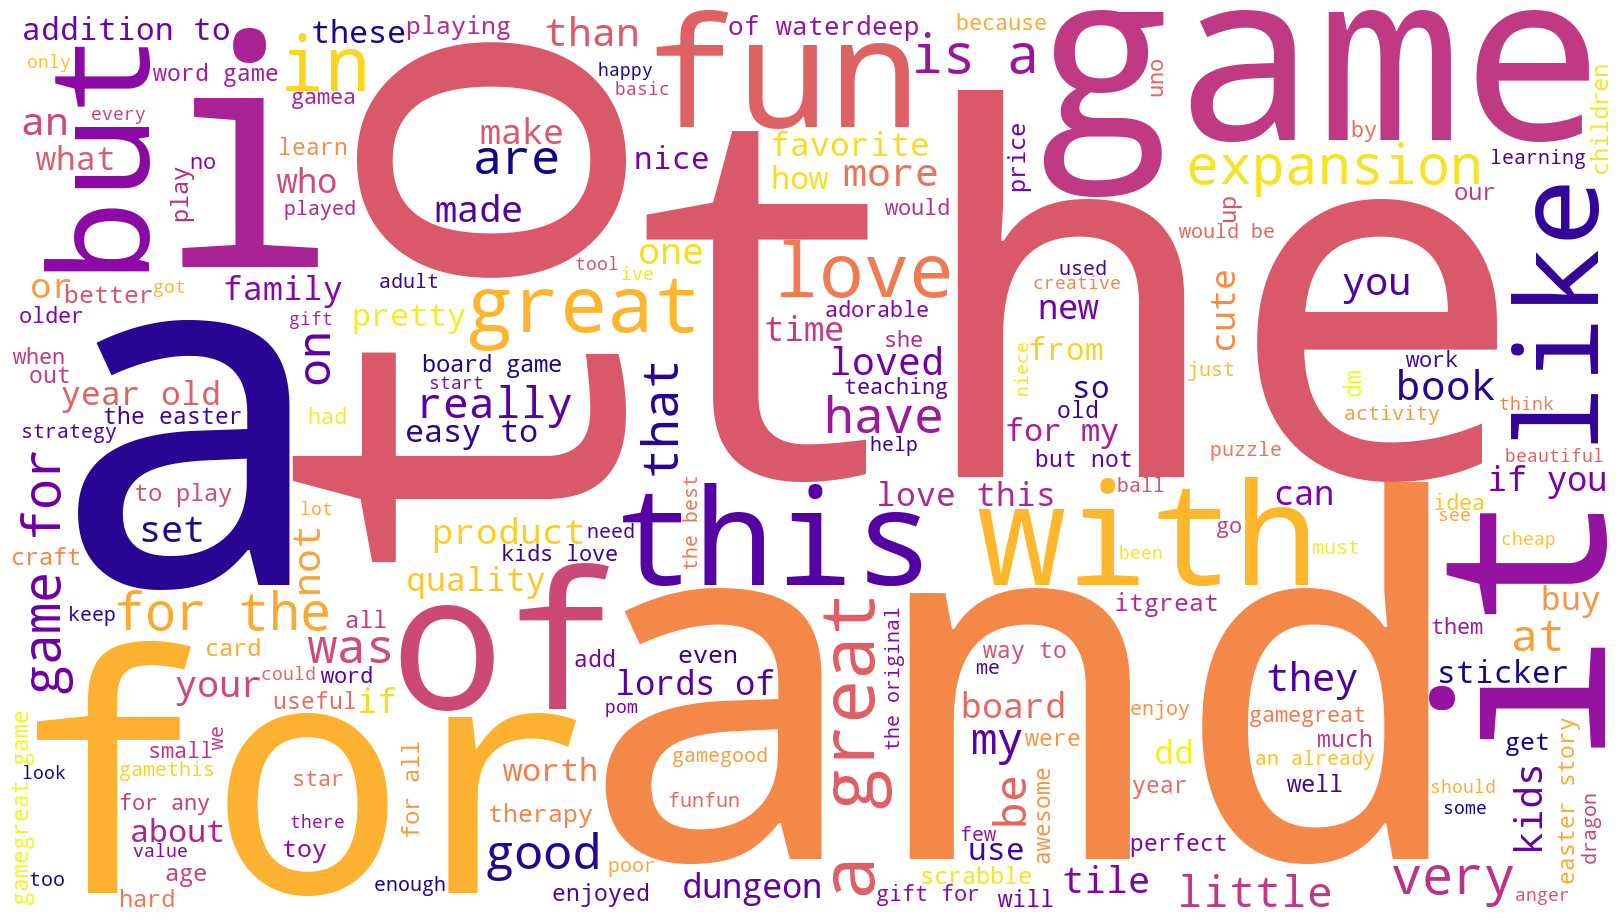

In [310]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [311]:
# Determine the frequency distribution of reviews data.
all_review_tokens = []
for t in review_words:
    all_review_tokens = all_review_tokens + t
    
FreqDist(all_review_tokens)

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

In [312]:
# Determine the frequency distribution of summary data.
all_summary_tokens = []
for t in summary_words:
    all_summary_tokens = all_summary_tokens + t
    
FreqDist(all_summary_tokens)

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove stopwords

In [313]:
# Delete all the alpanum.
for t in all_tokens:
    if not t.isalnum():
        print(t)

In [314]:
# Note: We've already removed non-alphanumeric characters in step 2b

# Retrieve the set of stopwords to use
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of review tokens without stopwords.
filtered_review_tokens = [x for x in all_review_tokens if x.lower() not in english_stopwords]

# Concatenate all review tokens
all_review_words = ' '.join(filtered_review_tokens)
    
# Create a filtered list of summary tokens without stopwords.
filtered_summary_tokens = [x for x in all_summary_tokens if x.lower() not in english_stopwords]

# Concatenate all summary tokens
all_summary_words = ' '.join(filtered_summary_tokens)

### 4c) Create wordcloud without stopwords

In [315]:
# Create a wordcloud without stop words by using the stopwords parameter.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review_words)

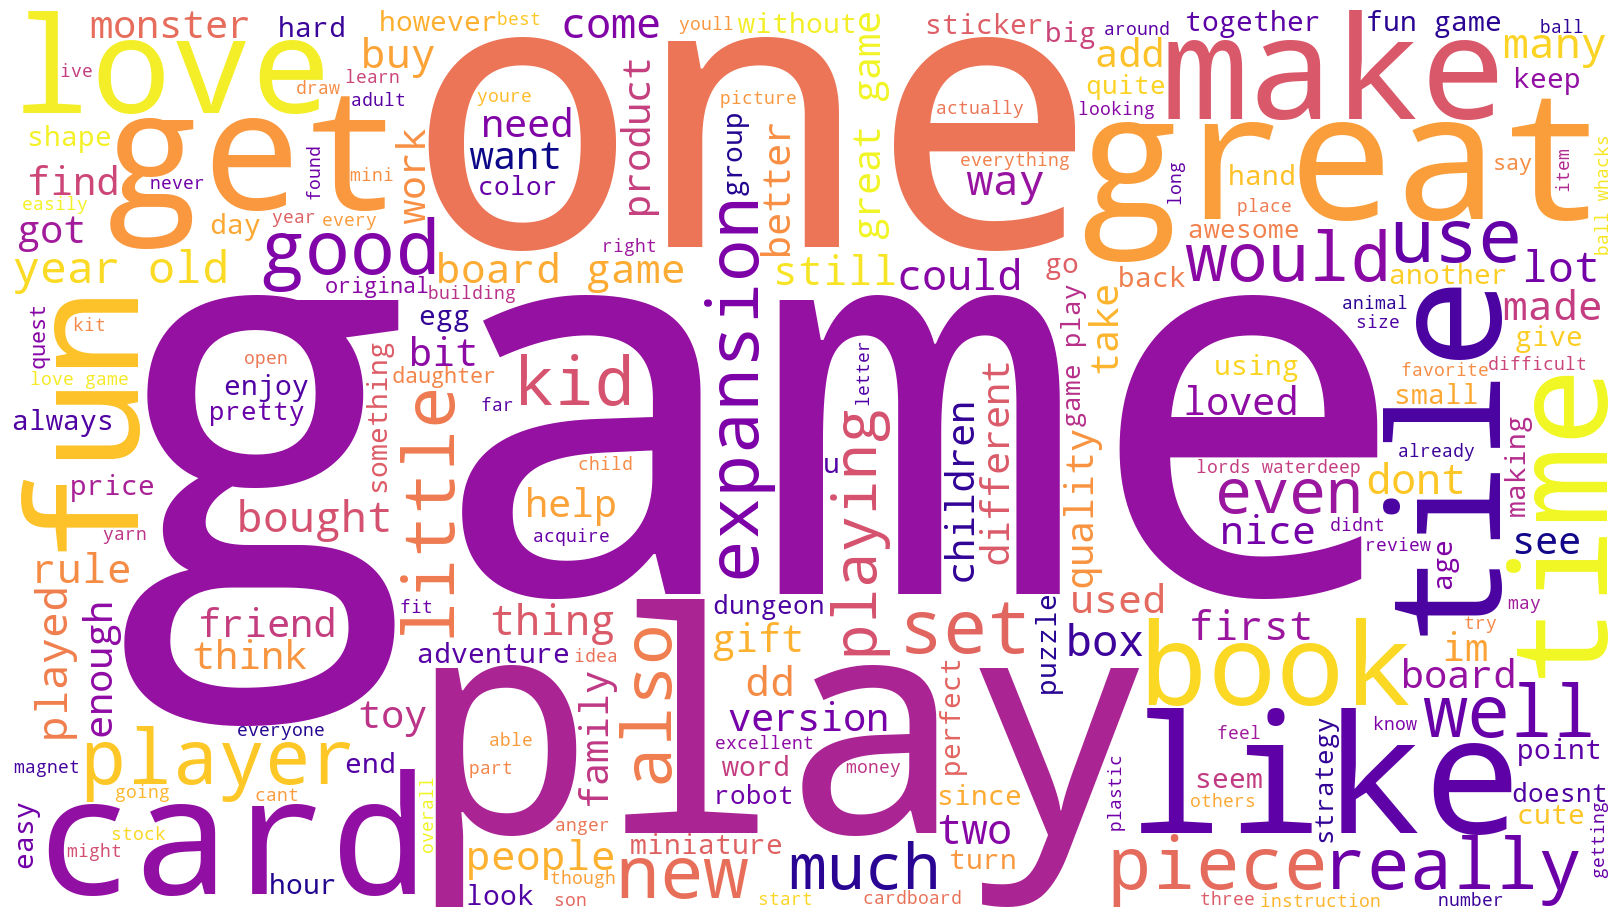

In [316]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [317]:
# Create a wordcloud without stop words by using the stopwords parameter.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary_words)

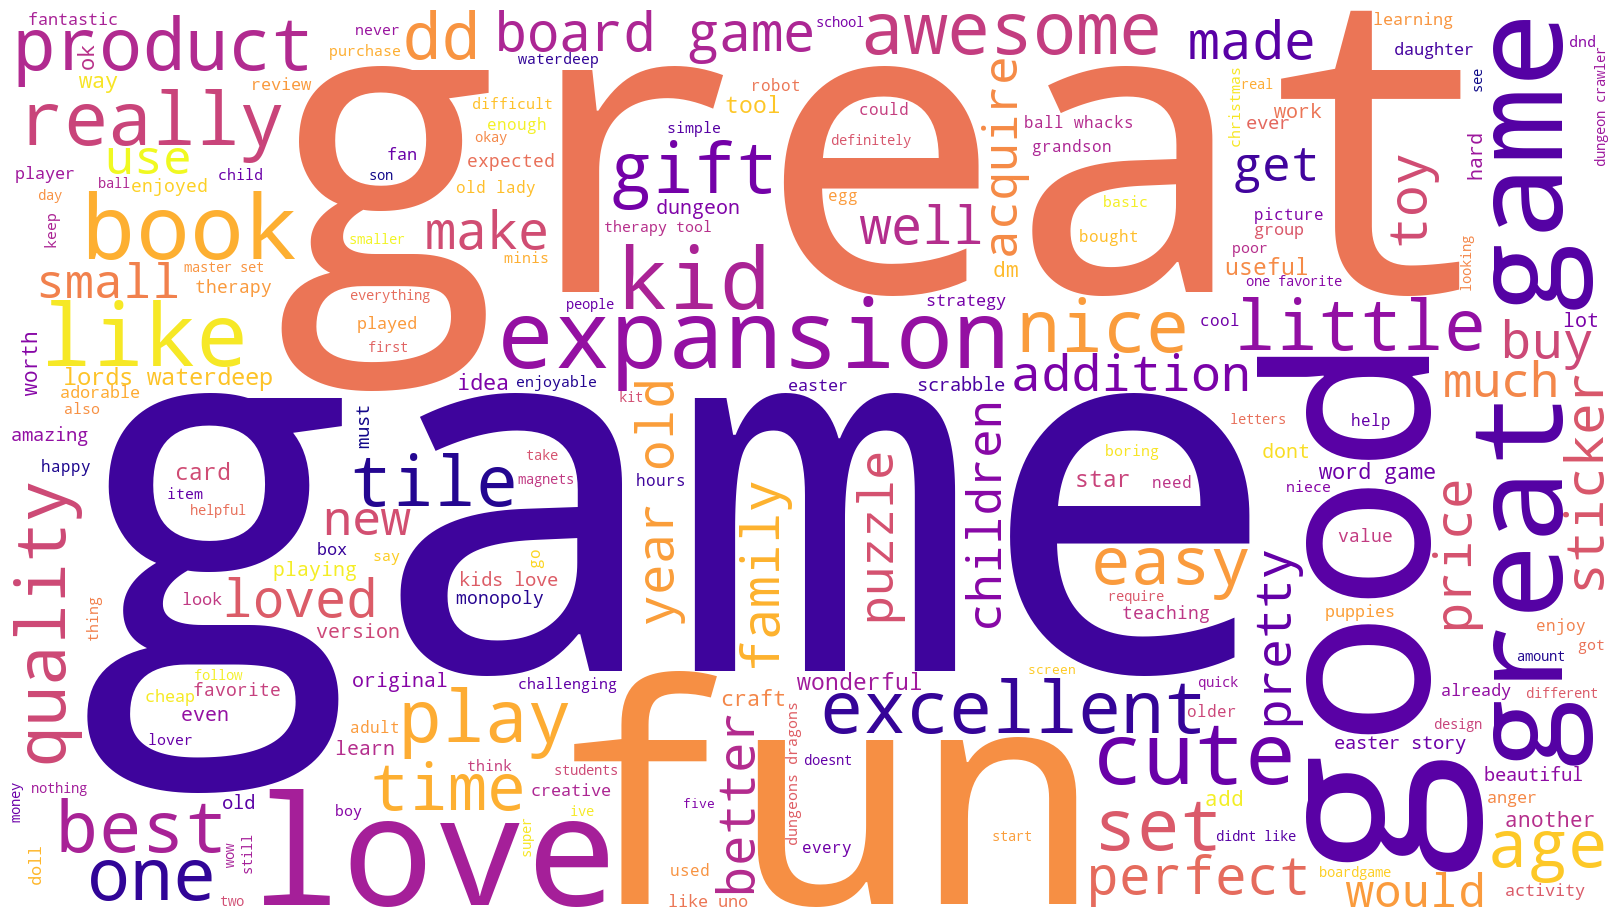

In [318]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [319]:
# Provided function to generate polarity given a comment.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Define a function to extract a subjectivity score for a comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [320]:
# Preview review word frequencies
FreqDist(filtered_review_tokens)

FreqDist({'game': 1668, 'great': 579, 'fun': 549, 'one': 530, 'play': 502, 'like': 414, 'love': 322, 'really': 319, 'get': 319, 'cards': 301, ...})

In [321]:
# Determine the 15 most common words in reviews and their polarities.
counts=pd.DataFrame(Counter(filtered_review_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')
counts['Polarity'] = [generate_polarity(x) for x in counts.index.values]
counts

,Frequency,Polarity
Word,,
game,1668,-0.4
great,579,0.8
fun,549,0.3
one,530,0.0
play,502,0.0
like,414,0.0
love,322,0.5
really,319,0.2
get,319,0.0


In [322]:
# Preview summary word frequencies
FreqDist(filtered_summary_tokens)

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [323]:
# Determine the 15 most common words in summaries and their polarities.
counts=pd.DataFrame(Counter(filtered_summary_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')
counts['Polarity'] = [generate_polarity(x) for x in counts.index.values]
counts

,Frequency,Polarity
Word,,
game,268,-0.4
great,237,0.8
fun,175,0.3
good,84,0.7
love,70,0.5
like,54,0.0
kids,48,0.0
book,42,0.0
expansion,42,0.0


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [324]:
# Determine polarity of both columns. 
df3_cleaned['review_polarity'] = df3_cleaned.review.apply(generate_polarity)
df3_cleaned['review_subjectivity'] = df3_cleaned.review.apply(generate_subjectivity)
df3_cleaned['summary_polarity'] = df3_cleaned.summary.apply(generate_polarity)
df3_cleaned['summary_subjectivity'] = df3_cleaned.summary.apply(generate_subjectivity)

# View output.
df3_cleaned.head()

,review,summary,review_polarity,summary_polarity,review_subjectivity,summary_subjectivity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15,0.486111,0.500000
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,0.035952,-0.80,0.442976,0.900000
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,0.116640,0.00,0.430435,0.733333
3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00,0.784848,0.000000
4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.00,0.316667,0.000000


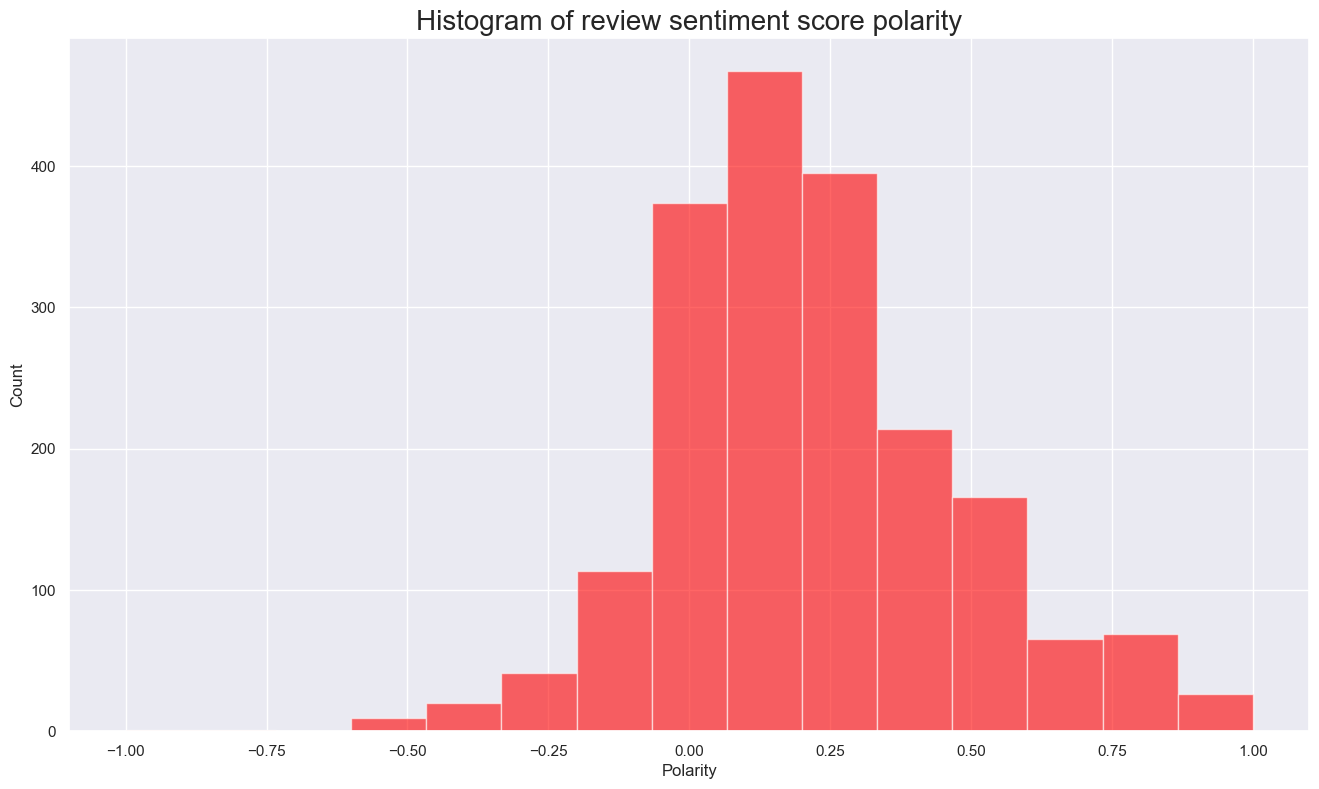

In [325]:
# Review: Histogram of polarity
plt.figure(figsize=(16,9))
plt.hist(df3_cleaned.review_polarity, 15, facecolor='red', alpha=0.6)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of review sentiment score polarity', fontsize=20)
plt.show()

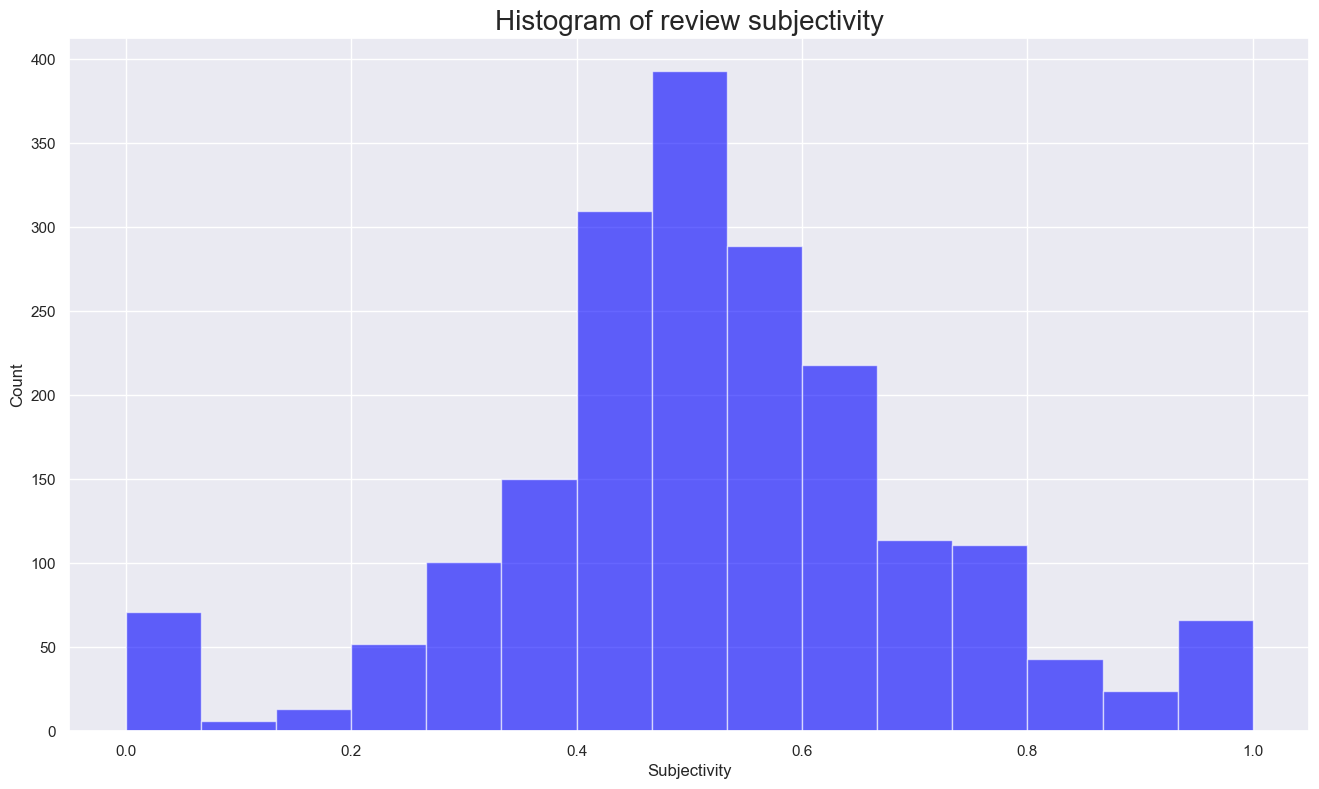

In [326]:
# Review: Histogram of subjectivity
plt.figure(figsize=(16,9))
plt.hist(df3_cleaned.review_subjectivity, 15, facecolor='blue', alpha=0.6)
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of review subjectivity', fontsize=20)
plt.show()

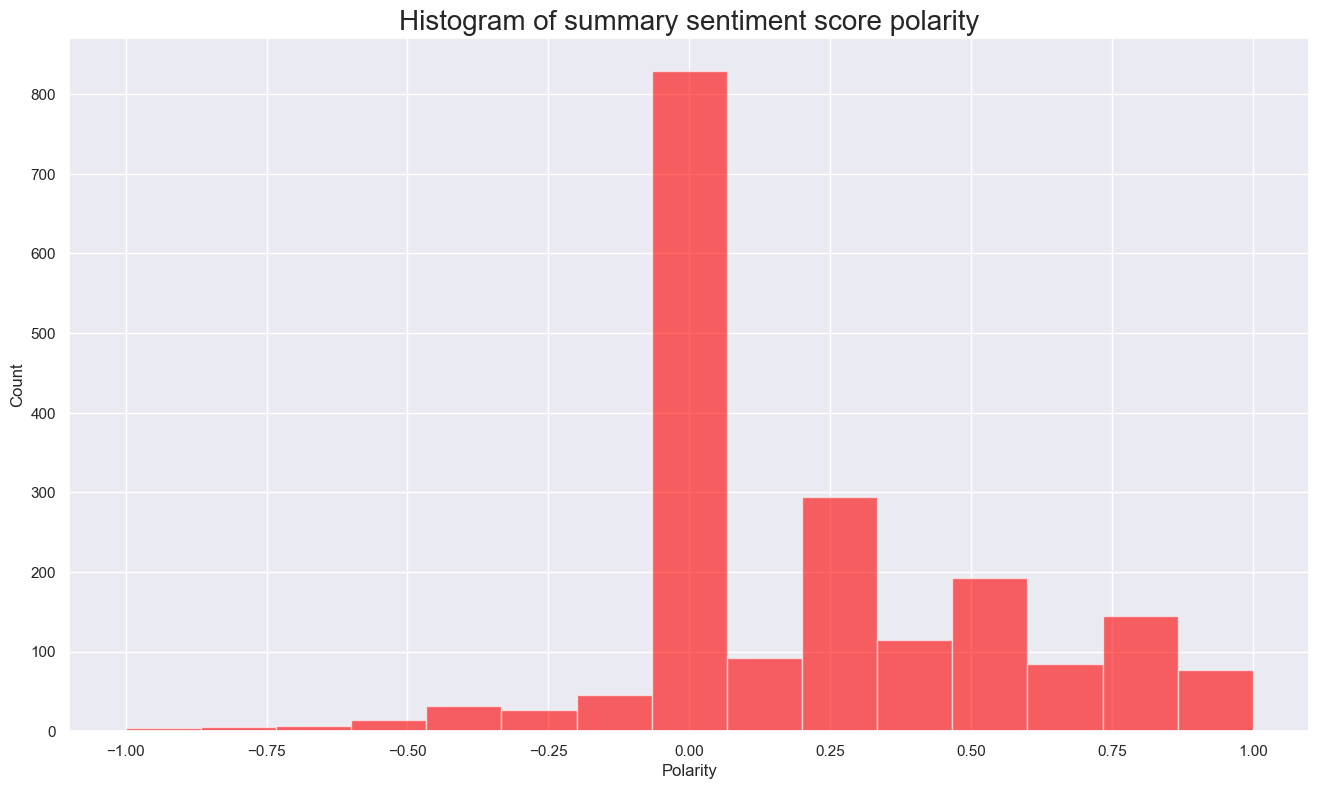

In [327]:
# Summary: Histogram of polarity
plt.figure(figsize=(16,9))
plt.hist(df3_cleaned.summary_polarity, 15, facecolor='red', alpha=0.6)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of summary sentiment score polarity', fontsize=20)
plt.show()

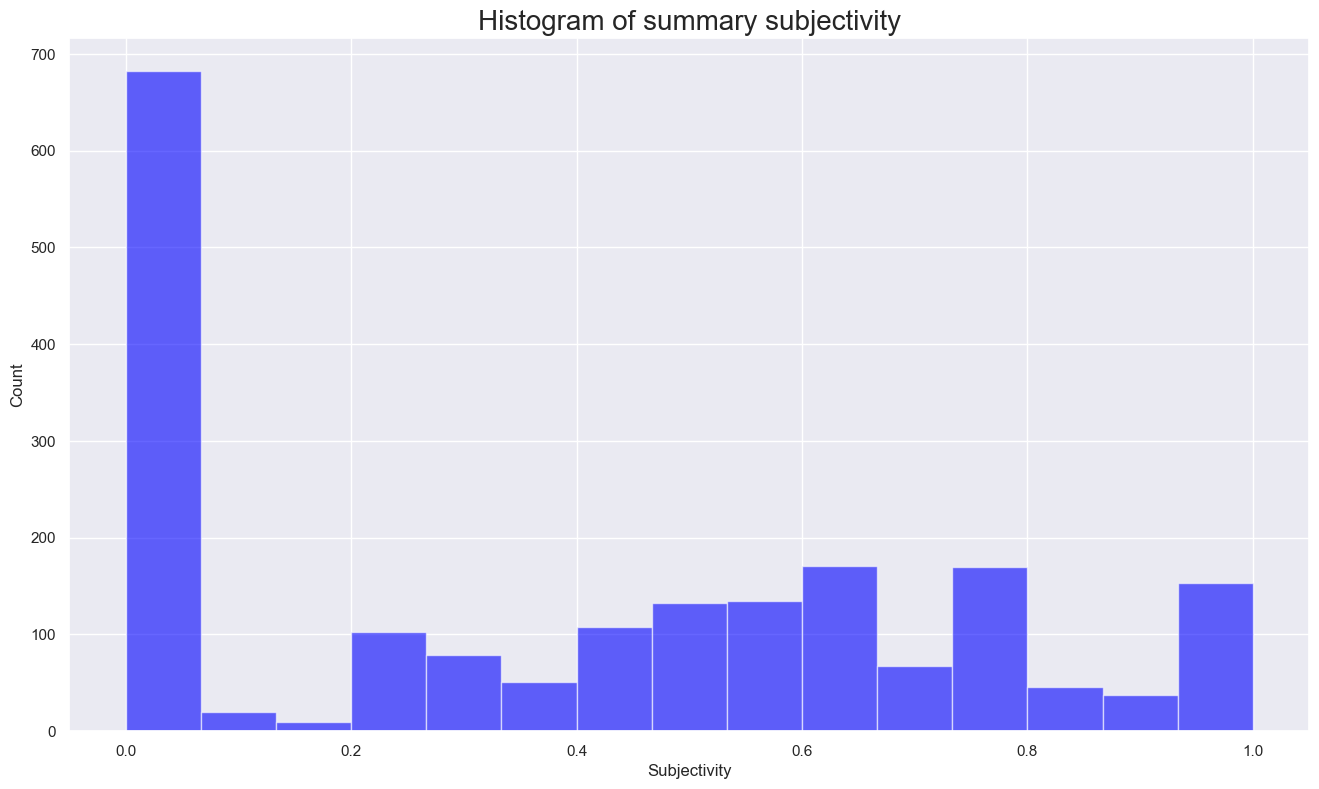

In [328]:
# Summary: Histogram of subjectivity
plt.figure(figsize=(16,9))
plt.hist(df3_cleaned.summary_subjectivity, 15, facecolor='blue', alpha=0.6)
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of summary subjectivity', fontsize=20)
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [334]:
# Top 20 negative reviews.
neg_reviews=df3_cleaned.drop_duplicates(subset=['review']).nsmallest(20, 'review_polarity')
neg_reviews=neg_reviews[['review', 'review_polarity', 'review_subjectivity']].reset_index(drop=True)

# View output.
neg_reviews.style.set_properties(subset='review', **{'width': '1200px'})

,review,review_polarity,review_subjectivity
0,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000,1.000000
1,incomplete kit very disappointing,-0.780000,0.910000
2,im sorry i just find this product to be boring and to be frank juvenile,-0.583333,0.750000
3,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000,0.300000
4,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000,0.900000
5,this was a gift for my daughter i found it difficult to use,-0.500000,1.000000
6,i found the directions difficult,-0.500000,1.000000
7,instructions are complicated to follow,-0.500000,1.000000
8,difficult,-0.500000,1.000000
9,expensive for what you get,-0.500000,0.700000


In [335]:
# Top 20 negative summaries.
neg_summaries=df3_cleaned.drop_duplicates(subset=['summary']).nsmallest(20, 'summary_polarity')
neg_summaries=neg_summaries[['summary', 'summary_polarity', 'summary_subjectivity']].reset_index(drop=True)

# View output.
neg_summaries.style.set_properties(subset='summary', **{'width': '1200px'})

,summary,summary_polarity,summary_subjectivity
0,the worst value ive ever seen,-1.000000,1.000000
1,boring unless you are a craft person which i am,-1.000000,1.000000
2,boring,-1.000000,1.000000
3,before this i hated running any rpg campaign dealing with towns because it,-0.900000,0.700000
4,another worthless dungeon masters screen from galeforce9,-0.800000,0.900000
5,disappointed,-0.750000,0.750000
6,promotes anger instead of teaching calming methods,-0.700000,0.200000
7,too bad this is not what i was expecting,-0.700000,0.666667
8,bad qualityall made of paper,-0.700000,0.666667
9,at age 31 i found these very difficult to make,-0.650000,1.000000


In [337]:
# Top 20 positive reviews.
pos_reviews=df3_cleaned.drop_duplicates(subset=['review']).nlargest(20, 'review_polarity')
pos_reviews=pos_reviews[['review', 'review_polarity', 'review_subjectivity']].reset_index(drop=True)

# View output.
pos_reviews.style.set_properties(subset='review', **{'width': '1200px'})

,review,review_polarity,review_subjectivity
0,came in perfect condition,1.000000,1.000000
1,awesome book,1.000000,1.000000
2,awesome gift,1.000000,1.000000
3,excellent activity for teaching selfmanagement skills,1.000000,1.000000
4,perfect just what i ordered,1.000000,1.000000
5,wonderful product,1.000000,1.000000
6,delightful product,1.000000,1.000000
7,wonderful for my grandson to learn the resurrection story,1.000000,1.000000
8,perfect,1.000000,1.000000
9,awesome,1.000000,1.000000


In [338]:
# Top 20 positive summaries.
pos_summaries=df3_cleaned.drop_duplicates(subset=['summary']).nlargest(20, 'summary_polarity')
pos_summaries=pos_summaries[['summary', 'summary_polarity', 'summary_subjectivity']].reset_index(drop=True)

# View output.
pos_summaries.style.set_properties(subset='summary', **{'width': '1200px'})

,summary,summary_polarity,summary_subjectivity
0,best gm screen ever,1.000000,0.300000
1,wonderful designs,1.000000,1.000000
2,perfect,1.000000,1.000000
3,theyre the perfect size to keep in the car or a diaper,1.000000,1.000000
4,perfect for preschooler,1.000000,1.000000
5,awesome sticker activity for the price,1.000000,1.000000
6,awesome book,1.000000,1.000000
7,he was very happy with his gift,1.000000,1.000000
8,awesome,1.000000,1.000000
9,awesome and welldesigned for 9 year olds,1.000000,1.000000


## 7. Discuss: Insights and observations

Customer reviews are often positive and subjective. Review summaries are mostly neutral and slightly positive but highly objective. The word clouds show that the products are popular with kids and adults alike. There are products perceived as fun, educational, and challenging. Some customers have mentioned that the games are addictive, while others have said that they were great gifts for kids. NLP made some mistakes when providing polarity scores for negative reviews because some of the text had irony or used negative words in a positive context so the findings should be adjusted to assume that polarity scores are likely to be slightly more positive than indicated.

# 